<a href="https://colab.research.google.com/github/MattLowrie/visualizing_running_time/blob/master/Interview_Questions_First_Duplicate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First Duplicate

There are several variations of this problem that can be found online. This
version involves returning the first occurance of a duplicate integer in a given array of integers, where any individual integer in the array is less than the length of array. If there are no duplicates in the array,
then -1 is returned. [Here](https://www.youtube.com/watch?v=XSdr_O-XVRQ) is a
video which describes the problem well.

The first implementation below runs in O(n) time, by keeping track of any duplicates, as it iterates the given array once. The second implementation
looks for duplicates by comparing each integer with every other integer in the array, using a nested loop. The graphs below demonstrate how this latter approach increases exponentially in running time as the size of the array increases.


In [0]:
from typing import List

def first_duplicate_fast(A: List[int]) -> int:
  """O(n) implementation."""
  dups = set()
  for n in A:
    if n in dups:
      return n
    else:
      dups.add(n)
  return -1

def first_duplicate_slow(A: List[int]) -> int:
  """O(n^2) implementation."""
  dupe_idx = None
  for i in range(len(A)):
    for j in range(i+1, len(A)):
      if A[i] == A[j]:
        if dupe_idx is None or j < dupe_idx:
          dupe_idx = j
  if dupe_idx is None:
    return -1
  else:
    return A[dupe_idx]

In [2]:
# Test both implementations
!pip install parameterized
from parameterized import parameterized
import unittest
test_cases = [
  ('Test0', [], -1),
  ('Test1', [1], -1),
  ('Test2', [2, 1], -1),
  ('Test3', [2, 2, 1], 2),
  ('Test4', [4, 3, 5, 1], -1),
  ('Test5', [5, 5, 4, 5, 5], 5),
  ('Test6', [1, 2, 3, 3, 2, 1], 3),
  ('Test7', [6, 5, 4, 3, 2, 7, 7], 7),
  ('Test8', [8, 2, 1, 3, 5, 7, 4, 8], 8),
  ('Test9', [8, 4, 6, 2, 6, 4, 9, 5, 8], 6),
]

class TestFirstDuplicate(unittest.TestCase):
  @parameterized.expand(test_cases)
  def testFast(self, name, arr, expected):
    actual = first_duplicate_fast(arr)
    self.assertEqual(expected, actual)
  @parameterized.expand(test_cases)
  def testSlow(self, name, arr, expected):
    actual = first_duplicate_slow(arr)
    self.assertEqual(expected, actual)

unittest.main(argv=[''], verbosity=0, exit=False)


----------------------------------------------------------------------
Ran 20 tests in 0.001s

OK


In [0]:
# Create input arrays of increasing sizes
import random
input_sizes = [2**e for e in range(10, 16)]
input_arrs = {}
for size in input_sizes:
  input_arrs[size] = [random.randrange(1, size+1) for _ in range(size)]

In [4]:
# Now time both functions with each input array
timing_samples = {}
for size, input_arr in input_arrs.items():
  tf = %timeit -o -n 3 first_duplicate_fast(input_arr)
  timing_samples[(size, 'fast')] = tf
  ts = %timeit -o -n 3 first_duplicate_slow(input_arr)
  timing_samples[(size, 'slow')] = ts

3 loops, best of 3: 2.61 µs per loop
3 loops, best of 3: 37.1 ms per loop
3 loops, best of 3: 5.36 µs per loop
3 loops, best of 3: 144 ms per loop
3 loops, best of 3: 9.22 µs per loop
3 loops, best of 3: 576 ms per loop
3 loops, best of 3: 15.1 µs per loop
3 loops, best of 3: 2.31 s per loop
3 loops, best of 3: 25.6 µs per loop
3 loops, best of 3: 9.25 s per loop
3 loops, best of 3: 37.3 µs per loop
3 loops, best of 3: 36.9 s per loop


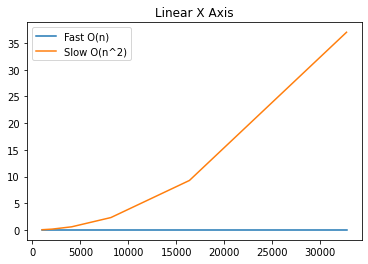

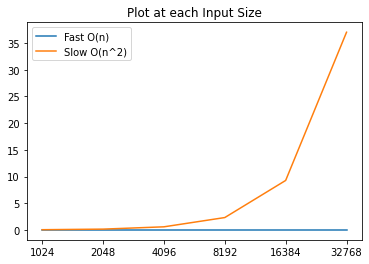

In [5]:
# Chart the timing data
chart_data = []
# for num_loops in loop_intervals:
for size in input_sizes:
  row = []
  fast_sample = timing_samples[(size, 'fast')]
  slow_sample = timing_samples[(size, 'slow')]
  row.append(((fast_sample.best + fast_sample.worst) / 2))
  row.append(((slow_sample.best + slow_sample.worst) / 2))
  chart_data.append(row)

import pandas as pd

legend = ['Fast O(n)', 'Slow O(n^2)']
# Show a linear chart
df1 = pd.DataFrame(chart_data, index=input_sizes, columns=legend)
df1.plot(title='Linear X Axis')
# Show a chart with normalized x-axis plots to highlight the logarithmic growth
x_labels = [str(x) for x in input_sizes]
df2 = pd.DataFrame(chart_data, index=x_labels, columns=legend)
df2.plot(title='Plot at each Input Size')